In [3]:
import cv2
from matplotlib import pyplot as plt

In [33]:
img_path = '/data/flag/test_sample/00020.jpg'
img = cv2.imread(img_path)

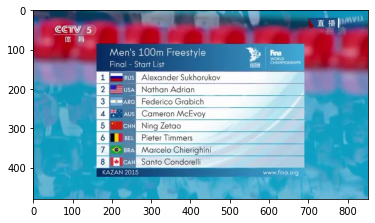

In [25]:
plt.imshow(img[:,:,::-1])

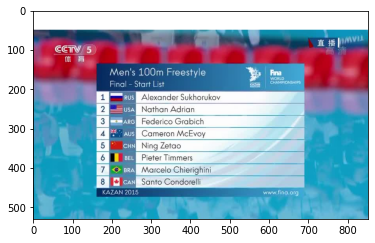

In [47]:
constant = cv2.copyMakeBorder(img,50,0,0,0,cv2.BORDER_CONSTANT,value=(255,255,255))
plt.imshow(constant[:,:,::-1])

In [6]:
img.shape

(480, 852, 3)

In [7]:
constant.shape

(520, 892, 3)

In [11]:
categories=[{'id':0, 'name': 'china'},
            {'id':1, 'name': 'us'},
            {'id':2, 'name': 'uk'},
           {'id':3, 'name': 'russia'},
           {'id':4, 'name': 'japan'},
           {'id':5, 'name': 'france'},
           {'id':6, 'name': 'german'},
           {'id':7, 'name': 'italy'},
           {'id':8, 'name': 'australia'},
           {'id':9, 'name': 'korea'},
           {'id':10, 'name': 'other'}]

In [14]:
t_sizes = []
for it in categories:
    label = it['name']
    idx = it['id']
    t_size = cv2.getTextSize(label, 0, fontScale=1 / 3, thickness=2)[0]
    t_sizes.append((idx,t_size))
t_sizes

[(0, (30, 8)),
 (1, (14, 8)),
 (2, (14, 8)),
 (3, (33, 8)),
 (4, (31, 8)),
 (5, (35, 8)),
 (6, (41, 8)),
 (7, (23, 8)),
 (8, (47, 8)),
 (9, (31, 8)),
 (10, (29, 8))]

In [15]:
total = 0
for t in t_sizes:
    total += t[1][0]
total

328

In [28]:
class Colors:
    # Ultralytics color palette https://ultralytics.com/
    def __init__(self):
        # hex = matplotlib.colors.TABLEAU_COLORS.values()
        hex = ('FF3838', 'FF9D97', 'FF701F', 'FFB21D', 'CFD231', '48F90A', '92CC17', '3DDB86', '1A9334', '00D4BB',
               '2C99A8', '00C2FF', '344593', '6473FF', '0018EC', '8438FF', '520085', 'CB38FF', 'FF95C8', 'FF37C7')
        #hex = ('99FF00','99FF33')
        self.palette = [self.hex2rgb('#' + c) for c in hex]
        self.n = len(self.palette)

    def __call__(self, i, bgr=False):
        c = self.palette[int(i) % self.n]
        return (c[2], c[1], c[0]) if bgr else c

    @staticmethod
    def hex2rgb(h):  # rgb order (PIL)
        return tuple(int(h[1 + i:1 + i + 2], 16) for i in (0, 2, 4))
    
colors = Colors()

In [51]:
def put_text(category,img):
    for cat in category:
        idx = cat['id']
        label = cat['name']
        color=colors(idx, True)
        print(color)
        if idx < 6:
            y1,y2 = 5,20
            x1,x2 = 10 + 50 * idx,10 + 50 * (idx+1)-5
        else:
            y1,y2 = 25,45
            x1,x2 = 10 + 50 * (idx%6),10 + 50 * ((idx+1)%6) -5
        c1 = (x1,y1)
        c2 = (x2,y2)
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)
        cv2.putText(img, label, (c1[0]+2, c2[1] - 5), 0, 1 / 3, [255, 255, 255], thickness=1, lineType=cv2.LINE_AA)
        #plt.figure(figsize=(10,10))
        #plt.imshow(img[:,:,::-1])

In [52]:
put_text(categories,constant)

(56, 56, 255)
(151, 157, 255)
(31, 112, 255)
(29, 178, 255)
(49, 210, 207)
(10, 249, 72)
(23, 204, 146)
(134, 219, 61)
(52, 147, 26)
(187, 212, 0)
(168, 153, 44)


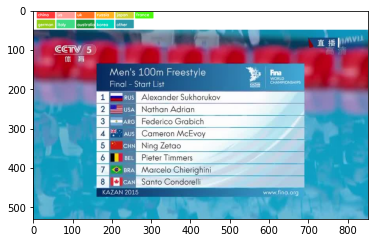

In [53]:
plt.imshow(constant[:,:,::-1])

In [50]:
img_path = '/data/flag/test_sample/00020_test.jpg'
cv2.imwrite(img_path,constant)

True

In [ ]:
c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
cv2.rectangle(im, c1, c2, color, -1, cv2.LINE_AA)  # filled
cv2.putText(im, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)